In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [7]:
df=pd.read_csv('winequality-red.csv',sep=';')
  #P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  #Modeling wine preferences by data mining from physicochemical properties.
  #In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In [8]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

la muestra esta desbalanceada

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<Axes: ylabel='quality'>

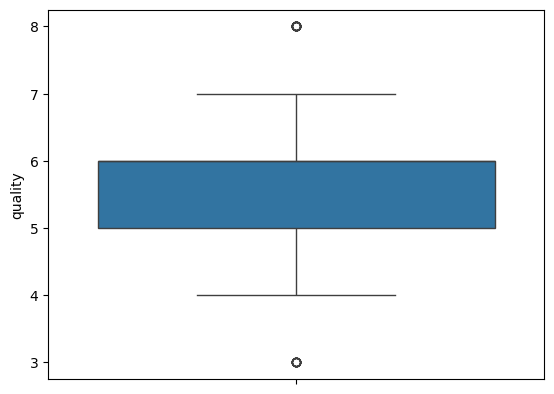

In [13]:
#hacer un boxplot para ver los outliers por categoria de quality
sns.boxplot(y='quality',data=df)




In [14]:
#determinar el Target

x=df.drop('quality', axis=1)
y=df['quality']

In [15]:
# Crear un objeto SMOTE, para balancear la muestra
smote = SMOTE(random_state=42)

# Aplicar SMOTE para balancear las clases
x, y= smote.fit_resample(x, y)

# Verificar el balance de las clases
print(x, y.value_counts())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.400000          0.700000     0.000000        1.900000   0.076000   
1          7.800000          0.880000     0.000000        2.600000   0.098000   
2          7.800000          0.760000     0.040000        2.300000   0.092000   
3         11.200000          0.280000     0.560000        1.900000   0.075000   
4          7.400000          0.700000     0.000000        1.900000   0.076000   
...             ...               ...          ...             ...        ...   
4081       7.460685          0.358786     0.319419        2.018466   0.074485   
4082       8.293899          0.365820     0.393055        2.040515   0.059241   
4083       7.729226          0.478521     0.326338        2.260916   0.075317   
4084       8.128720          0.523680     0.157238        2.240233   0.067690   
4085       7.581506          0.368579     0.402937        3.361130   0.073488   

      free sulfur dioxide  

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3268, 11), (818, 11), (3268,), (818,))

APLICAMOS MODELO KNN

In [17]:
#KNN modelo productivo
knn = KNeighborsClassifier(n_neighbors=3)


In [18]:
#fit the model to the training data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred_knn = knn.predict(x_test)

accuracy_score(y_test, y_pred_knn)

0.7383863080684596

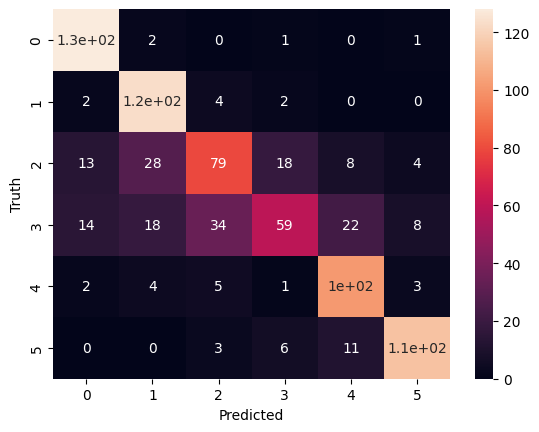

In [20]:
cm_knn= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [21]:
#calculate the recall 

from sklearn.metrics import recall_score

recall_score(y_test,y_pred_knn, average=None)



array([0.96969697, 0.9389313 , 0.52666667, 0.38064516, 0.87068966,
       0.85074627])

In [22]:
#calculate the precision
from sklearn.metrics import precision_score


precision_score(y_test, y_pred_knn, average=None)

array([0.80503145, 0.70285714, 0.632     , 0.67816092, 0.71126761,
       0.87692308])

In [23]:
#calculate the f1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_knn, average=None)

array([0.87972509, 0.80392157, 0.57454545, 0.48760331, 0.78294574,
       0.86363636])

In [24]:
#classification report
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           3       0.81      0.97      0.88       132
           4       0.70      0.94      0.80       131
           5       0.63      0.53      0.57       150
           6       0.68      0.38      0.49       155
           7       0.71      0.87      0.78       116
           8       0.88      0.85      0.86       134

    accuracy                           0.74       818
   macro avg       0.73      0.76      0.73       818
weighted avg       0.73      0.74      0.72       818



In [25]:
# el nkk no es el mejor modelo para este caso, pero mejora muchisimo al balancear la muestra.

NORMALIZAMOS PARA VOLVER A PROBAR EL KNN

In [26]:
#con el minMaxScaler estamos poniendo todo en un rango de 0 a 1

In [27]:
normalizer = MinMaxScaler()

In [28]:
#nunca se normaliza x_test ( el fit siempre es a x_train) porque no lo estamos entrenando, es un preprocesado.

In [29]:
normalizer.fit(x_train)

MinMaxScaler()

In [30]:
x_train_norm = normalizer.transform(x_train)

x_test_norm = normalizer.transform(x_test)

In [31]:
x_train_norm

array([[0.30851069, 0.60552729, 0.02361701, ..., 0.5750824 , 0.09785191,
        0.385161  ],
       [0.24837233, 0.34527678, 0.09942041, ..., 0.49427912, 0.09983817,
        0.10803272],
       [0.15986619, 0.59646364, 0.        , ..., 0.65179121, 0.12591435,
        0.40471776],
       ...,
       [0.22321429, 0.34306803, 0.06      , ..., 0.60629921, 0.12562992,
        0.16923077],
       [0.27605594, 0.26145732, 0.33134612, ..., 0.3690188 , 0.23083764,
        0.66649386],
       [0.35643568, 0.14483224, 0.37866604, ..., 0.44130594, 0.23906829,
        0.55307656]], shape=(3268, 11))

In [32]:
x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)
x_train_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.308511,0.605527,0.023617,0.173238,0.119798,0.065328,0.018946,0.626722,0.575082,0.097852,0.385161
1,0.248372,0.345277,0.099420,0.207336,0.123881,0.071862,0.079105,0.508609,0.494279,0.099838,0.108033
2,0.159866,0.596464,0.000000,0.059645,0.118178,0.217899,0.063604,0.315100,0.651791,0.125914,0.404718
3,0.497410,0.360267,0.477261,0.050568,0.192717,0.150159,0.127266,0.649334,0.416836,0.133647,0.126385
4,0.267857,0.432266,0.270000,0.181818,0.163606,0.464789,0.293286,0.459770,0.393701,0.071730,0.138462


In [33]:
x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)
x_test_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.714286,0.322484,0.450000,0.076923,0.116861,0.140845,0.056537,0.717241,0.204724,0.221451,0.138462
1,0.258929,0.288177,0.130000,0.090909,0.141903,0.323944,0.212014,0.552490,0.511811,0.167552,0.153846
2,0.375000,0.000000,0.450000,0.041958,0.105175,0.126761,0.053004,0.373946,0.527559,0.257384,0.538462
3,0.464286,0.157811,0.380000,0.020979,0.076795,0.422535,0.144876,0.468966,0.409449,0.293317,0.338462
4,0.510654,0.318031,0.407019,0.024823,0.104189,0.083518,0.067386,0.508163,0.337937,0.130008,0.243321


 KNN Clasification - modeling

In [34]:
#knn clasificacion
knn_N = KNeighborsClassifier(n_neighbors=3)


In [35]:
knn_N.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
#acuracy
y_pred_knn_N = knn_N.predict(x_test_norm)
accuracy_score(y_test, y_pred_knn_N)

0.78239608801956

In [37]:
#clasiification report
print(classification_report(y_test, y_pred_knn_N))

              precision    recall  f1-score   support

           3       0.92      1.00      0.96       132
           4       0.77      0.98      0.86       131
           5       0.62      0.57      0.59       150
           6       0.63      0.35      0.45       155
           7       0.76      0.93      0.83       116
           8       0.93      0.99      0.96       134

    accuracy                           0.78       818
   macro avg       0.77      0.80      0.78       818
weighted avg       0.77      0.78      0.76       818



 NKK no es el mejor modelo, aunque mejora un poco con la normalizacion

Heatmap, para determinar la correlación entre las variables

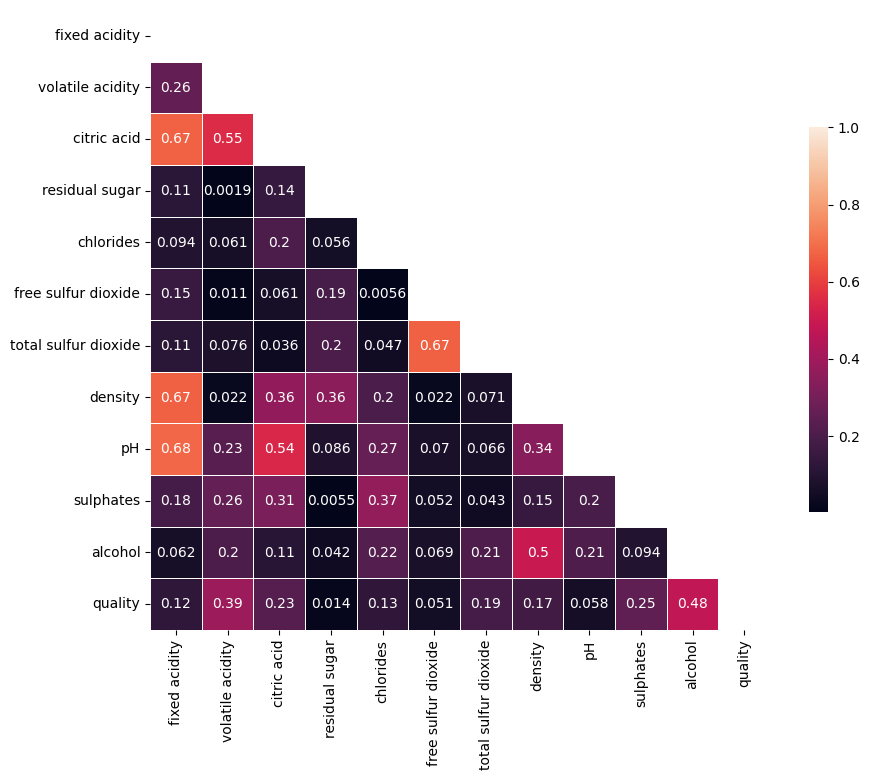

In [38]:
corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [39]:
#elimino columna fixed acidity porque tiene alta correlacion con pH, density, citric acid
x_train_norm = x_train.drop('fixed acidity', axis=1)
x_test_norm = x_test.drop('fixed acidity', axis=1)

APLICO KNN nuevamente, tras pre-selección de features

In [40]:

knn_drop= KNeighborsClassifier(n_neighbors=3)

In [41]:
knn_drop.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred_knn_drop = knn_drop.predict(x_test_norm)

accuracy_score(y_test, y_pred_knn_drop)

0.7212713936430318

In [43]:
knn_drop.score(x_test_norm, y_test)

0.7212713936430318

In [44]:
#classification report
print(classification_report(y_test, y_pred_knn_drop))

              precision    recall  f1-score   support

           3       0.79      0.93      0.85       132
           4       0.69      0.90      0.78       131
           5       0.67      0.56      0.61       150
           6       0.63      0.37      0.47       155
           7       0.70      0.83      0.76       116
           8       0.82      0.83      0.82       134

    accuracy                           0.72       818
   macro avg       0.72      0.74      0.72       818
weighted avg       0.71      0.72      0.71       818



In [45]:
# la columna fixed acidity al ser eliminada no mejora el modelo, lo empeora un poco. Debemos probar otros modelos.

MODELO DE REGRESION LOGISTICA

In [46]:
#aplico logistic regression

lr = LogisticRegression(max_iter=1000)


In [47]:
lr.fit(x_train, y_train)

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [48]:
lr.score(x_test, y_test)

0.558679706601467

LogisticRegression NORMALIZADO

In [49]:
lr.fit(x_train_norm, y_train)

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [50]:
lr.score(x_test_norm, y_test)

0.5941320293398533

Aplico el modelo de Decision Tree

In [51]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train, y_train)

dt.score(x_test, y_test)


0.7787286063569682

Decision Tree Normalizado

In [52]:
dt_norm = DecisionTreeClassifier(random_state=42)

In [53]:
dt_norm.fit(x_train_norm, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:


dt_norm.score(x_test_norm, y_test)


0.7787286063569682

RandomForest  Classifier Modelo productivo

In [80]:
#random forest (n_estimators es el hiperparametro)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_train, y_train)

rf.score(x_test, y_test)



0.8459657701711492

In [56]:
#acuracy de rf
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.8459657701711492

In [57]:
#classification report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           3       0.96      1.00      0.98       132
           4       0.88      0.98      0.92       131
           5       0.72      0.77      0.74       150
           6       0.74      0.52      0.61       155
           7       0.84      0.90      0.87       116
           8       0.94      0.99      0.96       134

    accuracy                           0.85       818
   macro avg       0.84      0.86      0.85       818
weighted avg       0.84      0.85      0.84       818



RandomForestClassifier Normalizado

In [58]:
rf_norm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_norm.fit(x_train_norm, y_train)
y_pred_rf_norm = rf_norm.predict(x_test_norm)
accuracy_score(y_test, y_pred_rf_norm)


0.863080684596577

In [59]:
#classification report rf
print(classification_report(y_test, y_pred_rf_norm))

              precision    recall  f1-score   support

           3       0.94      1.00      0.97       132
           4       0.89      0.96      0.92       131
           5       0.75      0.78      0.76       150
           6       0.79      0.56      0.66       155
           7       0.86      0.95      0.90       116
           8       0.95      1.00      0.97       134

    accuracy                           0.86       818
   macro avg       0.86      0.88      0.86       818
weighted avg       0.86      0.86      0.86       818



RandomForestClassifier es el mejor modelo para este caso, con un accuracy de 0.86

AdaBoostClassifier

In [60]:
#AdaBoost

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(x_train, y_train)
ada.score(x_test, y_test)


0.4156479217603912

ADABOOST NORMALIZADO

In [61]:
ada_norm = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_norm.fit(x_train_norm, y_train)
ada_norm.score(x_test_norm, y_test)

0.4278728606356968

In [62]:
#El adaboost no es un buen modelo para este caso, el mejor modelo es el random forest normalizado

GRADIENT BOOSTING

In [63]:
GradientBoostingClassifier

sklearn.ensemble._gb.GradientBoostingClassifier

In [64]:
#gradient boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)
gb.score(x_test, y_test)


0.8117359413202934

In [65]:
#aplicar al gradient boosting precision 
y_pred_gb = gb.predict(x_test)

precision_score(y_test, y_pred_gb, average=None)



array([0.92198582, 0.84827586, 0.70469799, 0.67768595, 0.75396825,
       0.94852941])

In [66]:
#recall
recall_score(y_test, y_pred_gb, average=None)

array([0.98484848, 0.9389313 , 0.7       , 0.52903226, 0.81896552,
       0.96268657])

In [67]:
#f1 score

f1_score(y_test, y_pred_gb, average=None)

array([0.95238095, 0.89130435, 0.70234114, 0.5942029 , 0.78512397,
       0.95555556])

GradientBoostingClassifier NOrmalizado

In [68]:
#gradient boosting con normalizacion
gb_norm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_norm.fit(x_train_norm, y_train)
gb_norm.score(x_test_norm, y_test)

0.8202933985330073

In [69]:
#gradient boosting con normalizacion precision
y_pred_gb_norm = gb_norm.predict(x_test_norm)

precision_score(y_test, y_pred_gb_norm, average=None)


array([0.94202899, 0.84615385, 0.70860927, 0.68333333, 0.78571429,
       0.94285714])

In [70]:
#recall
recall_score(y_test, y_pred_gb_norm, average=None)

array([0.98484848, 0.92366412, 0.71333333, 0.52903226, 0.85344828,
       0.98507463])

In [71]:
#f1 score
f1_score(y_test, y_pred_gb_norm, average=None)

array([0.96296296, 0.88321168, 0.71096346, 0.59636364, 0.81818182,
       0.96350365])

In [72]:
#classification report
print(classification_report(y_test, y_pred_gb_norm))


              precision    recall  f1-score   support

           3       0.94      0.98      0.96       132
           4       0.85      0.92      0.88       131
           5       0.71      0.71      0.71       150
           6       0.68      0.53      0.60       155
           7       0.79      0.85      0.82       116
           8       0.94      0.99      0.96       134

    accuracy                           0.82       818
   macro avg       0.82      0.83      0.82       818
weighted avg       0.81      0.82      0.81       818



CROSS VALIDATION A TRAVES DE RAMDOMIZED SEARCH CV

In [73]:
#ramdomized search con ramdom forest normalizado

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf_norm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(x_train_norm, y_train)

rf_random.best_params_

rf_random.score(x_test_norm, y_test)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:

0.8667481662591687

In [79]:
#classification report par el rf random
y_pred_rf_random = rf_random.predict(x_test_norm)
print(classification_report(y_test, y_pred_rf_random))

              precision    recall  f1-score   support

           3       0.97      1.00      0.99       132
           4       0.91      0.98      0.95       131
           5       0.74      0.77      0.75       150
           6       0.75      0.60      0.67       155
           7       0.88      0.91      0.89       116
           8       0.96      1.00      0.98       134

    accuracy                           0.87       818
   macro avg       0.87      0.88      0.87       818
weighted avg       0.86      0.87      0.86       818

